In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split as tts
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

In [19]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/Training'
n_train_glioma = len(os.listdir(f'{train_dir}/glioma'))
n_train_mening = len(os.listdir(f'{train_dir}/meningioma'))
n_train_pit = len(os.listdir(f'{train_dir}/pituitary'))
n_train_non = len(os.listdir(f'{train_dir}/notumor'))


# Total length of the whole classes combined
total_train = n_train_glioma + n_train_mening + n_train_pit + n_train_non

In [20]:
# Count length
count = [n_train_glioma, n_train_mening, n_train_pit, n_train_non, total_train]
length = ['glioma', ' meningioma', 'pituitary', 'no tumor', 'total images']

for i, sum in zip(length, count):
  print(f'Total counts of {i} is {sum}')
  print(100*'-')

Total counts of glioma is 1317
----------------------------------------------------------------------------------------------------
Total counts of  meningioma is 1331
----------------------------------------------------------------------------------------------------
Total counts of pituitary is 1457
----------------------------------------------------------------------------------------------------
Total counts of no tumor is 1595
----------------------------------------------------------------------------------------------------
Total counts of total images is 5700
----------------------------------------------------------------------------------------------------


In [ ]:
class_labels = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']
class_counts = [n_train_glioma, n_train_mening, n_train_pit, n_train_non]

<ipython-input-21-ea309d3e31b6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_labels, y=class_counts, palette="viridis")


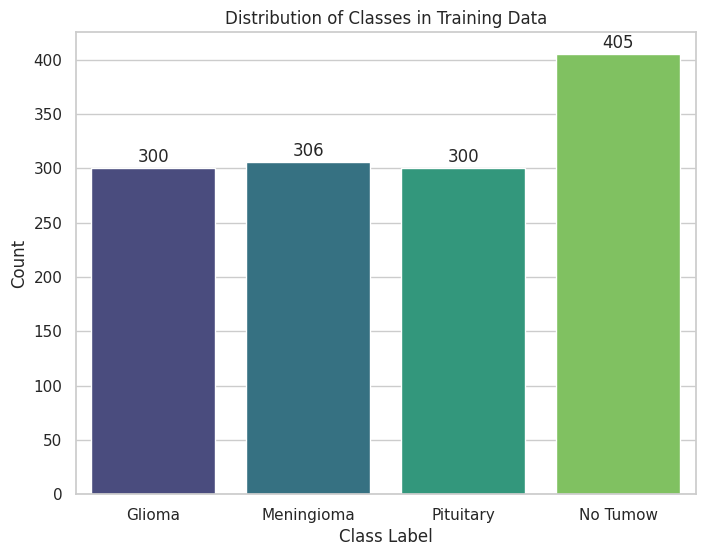

In [21]:
# Create a countplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_labels, y=class_counts, palette="viridis")

# Annotate the counts on top of the bars
for i, count in enumerate(class_counts):
    ax.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=12)

plt.title("Distribution of Classes in Training Data")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

In [22]:
test_dir="/content/drive/MyDrive/Colab Notebooks/Testing"

n_test_glioma = len(os.listdir(f'{test_dir}/glioma'))
n_test_mening = len(os.listdir(f'{test_dir}/meningioma'))
n_test_pit = len(os.listdir(f'{test_dir}/pituitary'))
n_test_non = len(os.listdir(f'{test_dir}/notumor'))


# Total length of the whole classes combined
total_test = n_test_glioma + n_test_mening + n_test_pit + n_test_non

In [23]:
# Count length
count = [n_test_glioma, n_test_mening, n_test_pit, n_test_non, total_test]
length = ['glioma', ' meningioma', 'pituitary', 'no tumor', 'total images']

for i, sum in zip(length, count):
  print(f'Total counts of {i} is {sum}')
  print(100*'-')

Total counts of glioma is 300
----------------------------------------------------------------------------------------------------
Total counts of  meningioma is 306
----------------------------------------------------------------------------------------------------
Total counts of pituitary is 300
----------------------------------------------------------------------------------------------------
Total counts of no tumor is 405
----------------------------------------------------------------------------------------------------
Total counts of total images is 1311
----------------------------------------------------------------------------------------------------


In [24]:
class_labels = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumow']
class_counts = [n_test_glioma, n_test_mening, n_test_pit, n_test_non]

<ipython-input-25-bcf986257a76>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_labels, y=class_counts, palette="viridis")


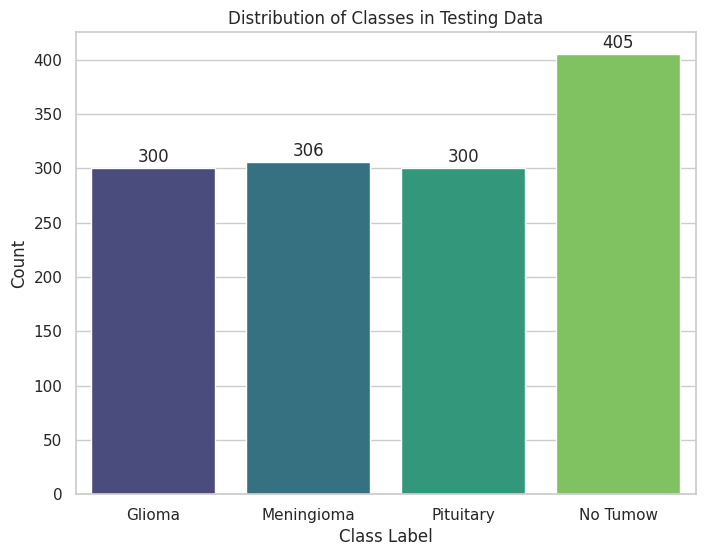

In [25]:
# Create a countplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_labels, y=class_counts, palette="viridis")

# Annotate the counts on top of the bars
for i, count in enumerate(class_counts):
    ax.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=12)

plt.title("Distribution of Classes in Testing Data")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

In [26]:
#Data generator on training and testing set
train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=20,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2,
                                 shear_range=0.2,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 fill_mode='reflect')

test_datagen=ImageDataGenerator(rescale=1./255)

In [27]:
#Creating Training set and validation set
training_set=train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=16,
                                               class_mode='categorical')

test_set=test_datagen.flow_from_directory(test_dir,
                                          target_size=(224,224),
                                          batch_size=16,
                                          class_mode="categorical")

Found 5700 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [28]:
batch_size=16
color_channel=3
image_shape=(224,224,3)

In [29]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3, ResNet101
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, LSTM, Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Dropout, Reshape, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

###VGG16

In [30]:
# Define the model
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=image_shape))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())

# Block 2
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())

# Block 3
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())

# Block 4
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(class_labels), activation='softmax'))

model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 14, 14, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 59,284,548 (226.15 MB)

 Trainable params: 59,282,628 (226.15 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Datagen2/VGG16.keras', monitor='val_accuracy', save_best_only=True)



# Train the model
history1 = model.fit(
    training_set,
    epochs=50,
    validation_data=test_set,
    callbacks=[checkpoint]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 4094s 11s/step - accuracy: 0.3955 - loss: 6.5576 - val_accuracy: 0.2288 - val_loss: 3.2266
Epoch 2/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 95s 258ms/step - accuracy: 0.4456 - loss: 1.2406 - val_accuracy: 0.3661 - val_loss: 2.1869
Epoch 3/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 96s 261ms/step - accuracy: 0.4513 - loss: 1.2108 - val_accuracy: 0.5416 - val_loss: 1.3782
Epoch 4/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 90s 242ms/step - accuracy: 0.4675 - loss: 1.1910 - val_accuracy: 0.4653 - val_loss: 1.3228
Epoch 5/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 88s 242ms/step - accuracy: 0.4302 - loss: 1.2046 - val_accuracy: 0.5034 - val_loss: 1.0705
Epoch 6/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 88s 242ms/step - accuracy: 0.4338 - loss: 1.1846 - val_accuracy: 0.3692 - val_loss: 1.4298
Epoch 7/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 88s 242ms/step - accuracy: 0.4425 - loss: 1.1866 - val_accuracy: 0.4226 - val_loss: 1.1633
Epoch 8/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 88s 243ms/step - accuracy: 0.4191 - loss: 1.1523 - val

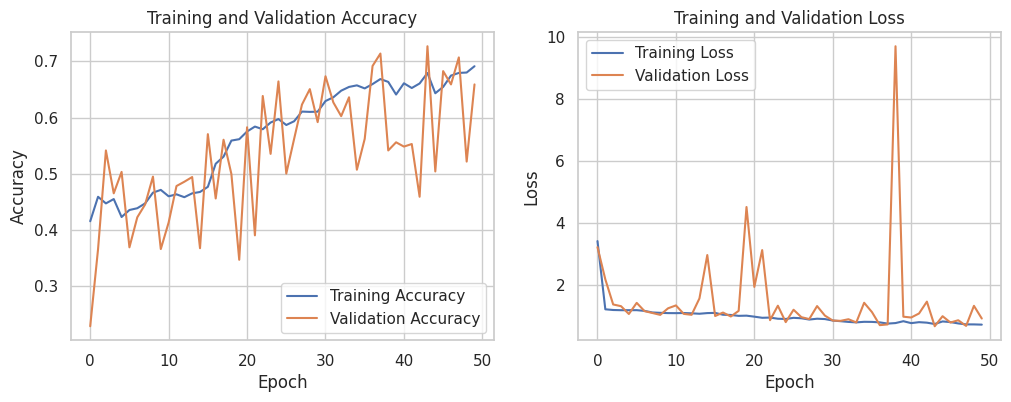

In [32]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

###InceptionV3

In [33]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=image_shape)


for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(class_labels), activation='softmax')(x)

# Create the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()




87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 111, 111, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 111, 111, 32)   │             96 │ conv2d_20[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization_8… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 109, 109, 32)   │             96 │ conv2d_21[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 109, 109, 64)   │            192 │ conv2d_22[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 54, 54, 80)     │            240 │ conv2d_23[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_24 (Conv2D)        │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 52, 52, 192)    │            576 │ conv2d_24[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 23,905,060 (91.19 MB)

 Trainable params: 2,102,276 (8.02 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [35]:

checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Datagen2/Inceptionv3.keras', monitor='val_accuracy', save_best_only=True)


history = model.fit(
    training_set,
    epochs=25,
    validation_data=test_set,
    callbacks=[checkpoint]
)


Epoch 1/25
357/357 ━━━━━━━━━━━━━━━━━━━━ 115s 280ms/step - accuracy: 0.6444 - loss: 1.1608 - val_accuracy: 0.7941 - val_loss: 0.5251
Epoch 2/25
357/357 ━━━━━━━━━━━━━━━━━━━━ 78s 213ms/step - accuracy: 0.7782 - loss: 0.5908 - val_accuracy: 0.8024 - val_loss: 0.5143
Epoch 3/25
357/357 ━━━━━━━━━━━━━━━━━━━━ 79s 217ms/step - accuracy: 0.7745 - loss: 0.5680 - val_accuracy: 0.8246 - val_loss: 0.4799
Epoch 4/25
357/357 ━━━━━━━━━━━━━━━━━━━━ 76s 208ms/step - accuracy: 0.7814 - loss: 0.5580 - val_accuracy: 0.7879 - val_loss: 0.5569
Epoch 5/25
357/357 ━━━━━━━━━━━━━━━━━━━━ 77s 213ms/step - accuracy: 0.7922 - loss: 0.5326 - val_accuracy: 0.8246 - val_loss: 0.4559
Epoch 6/25
357/357 ━━━━━━━━━━━━━━━━━━━━ 77s 210ms/step - accuracy: 0.7976 - loss: 0.5213 - val_accuracy: 0.7956 - val_loss: 0.5496
Epoch 7/25
357/357 ━━━━━━━━━━━━━━━━━━━━ 79s 216ms/step - accuracy: 0.8086 - loss: 0.4980 - val_accuracy: 0.8276 - val_loss: 0.4404
Epoch 8/25
357/357 ━━━━━━━━━━━━━━━━━━━━ 78s 214ms/step - accuracy: 0.8017 - loss: 

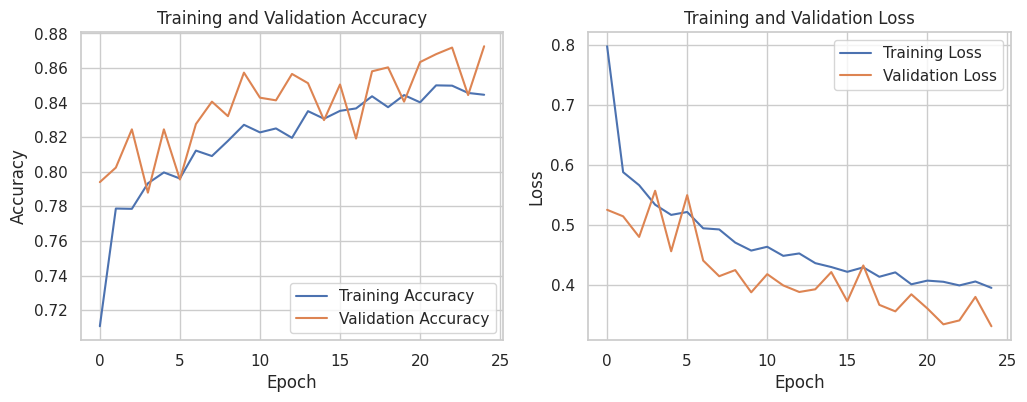

In [36]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

### ResNet 101


In [60]:
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=image_shape)


for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(4, activation='softmax')
])

In [61]:
model.summary()

ValueError: Undefined shapes are not supported.

In [62]:
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=image_shape)


for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(4, activation='softmax')
])

In [63]:
model.summary()

ValueError: Undefined shapes are not supported.